# Numeric data

In this notebook we talk about some of the functions and methods that are commonly used to deal with numeric columns in our data, in preparation to doing machine learning. Numeric columns can be **integer**, **float**, or **datetime** columns.

As usual, let's begin by reading some data.

In [1]:
import pandas as pd

auto = pd.read_csv('data/auto-mpg.csv', sep = '\s+', header = None, 
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                            'acceleration', 'model year', 'origin', 'car_name'])
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Let's check the data types:

In [2]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car_name         object
dtype: object

We can see that we have quite a few numeric columns in here. However, we also need to be careful: a column like `cylinders` looks numeric, but probably should be treated as a categorical column. Why? As yourself which one of these two is more likely:

- do any kind of math with `cylinders`, such as taking the log of it, adding it to another column, or being interested in knowing the average number of cylinders?
- use cylinder as a grouping variable, such as wanting to see the average horsepower **by cylinder**?

We can probably agree that the second case is more likely. For this reason, we need convert cylinder into a categorical column. More on categorical columns in the next lesson.

In [3]:
auto['cylinders'] = auto['cylinders'].astype('category')

Let's now look at some distributions for our numeric columns.

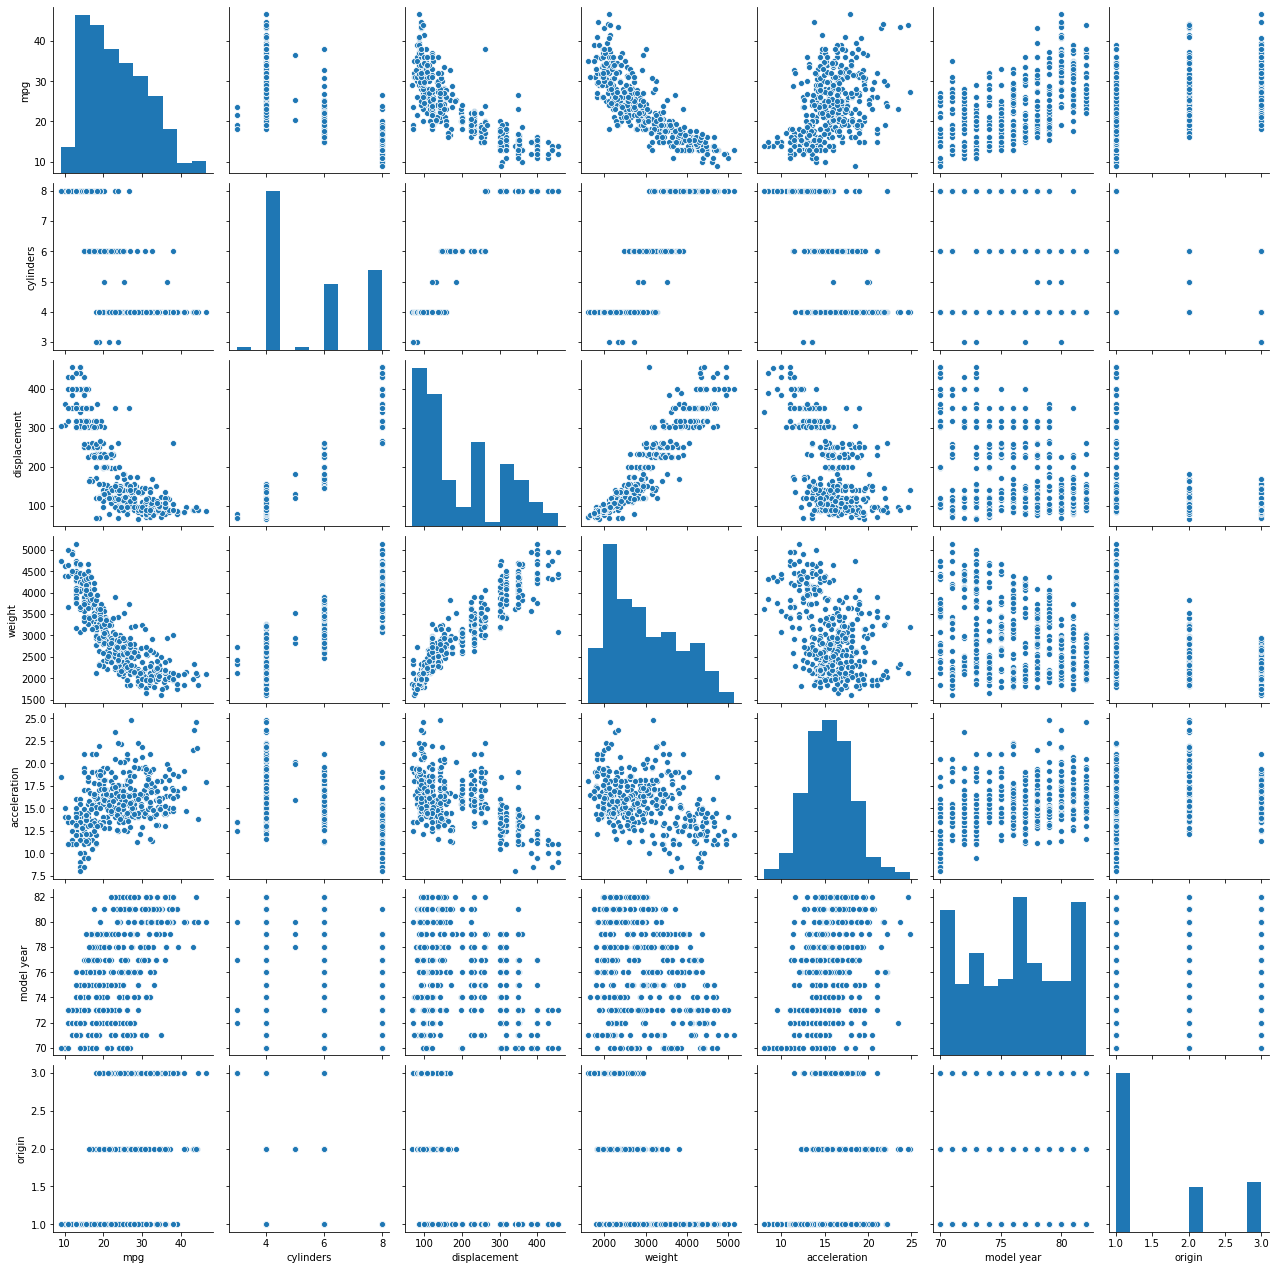

In [4]:
import seaborn as sns

sns.pairplot(auto);

### Exercise

We can see that `weight` and `displacement` have a **positive relationship** (as one goes up, so does the other, and vice versa). We may wonder if `cylinders` plays a part.

Import the `seaborn` library and plot the scatter plot between `weight` and `displacement`, then use the `hue` argument to color-code it by `cylinders`.

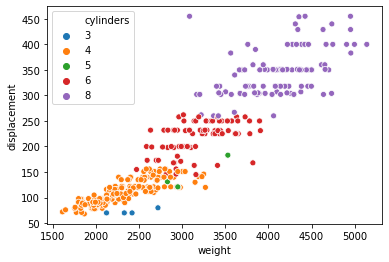

In [20]:
sns.scatterplot(x='weight', 
                y='displacement', 
                hue='cylinders', 
                data=auto);

### End of exercise

Let's look at some summary statistics for `acceleration`. One quick and easy way to do that is using `describe`.

In [21]:
results_all = auto.describe()
results_all

,mpg,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,455.000000,5140.000000,24.800000,82.000000,3.000000


Notice that the result of `describe` itself looks look a `DataFrame`. That means that if we wanted to extract certain pieces out of it, we should be able to do it using the methods we learned for working with `DataFrame` objects.

### Exercise

Extract the mean and standard deviation for acceleration from the results above and store them in variables called `acc_mean` and `acc_std`.

In [23]:
acc_mean = results_all.loc['mean']['acceleration']
acc_std = results_all.loc['std']['acceleration']
print('Mean is ' + str(acc_mean))
print('Std is ' + str(acc_std))

Mean is 15.568090452261307
Std is 2.757688929812676


### End of exercise

There are other functions we can use to get additional summary statistics from the data. For example, notice that `describe` only shows us the 25th, 50th, and 75th **percentiles**. The $p$th percentile is **a value such that $p$ percent of the data is below that value**, which means the remaining $1-p$ percent of the data is above that value. For example, if the 25th percentile for acceleration `mpg` is 17.5, then 25 percent of cars in our data have `mpg` below 17.0. The 50th percentile is also known as the **median**.

Looking at percentiles helps us get a feel for the distribution of the data. For example, looking at very low or very high percentiles can help us identify **outliers** or **extreme values**. We can use the `quantile` method to get any percentile we want. Here's how:

In [12]:
auto.quantile(q = [0.05, 0.25, 0.50, 0.75, 0.95])

,mpg,displacement,weight,acceleration,model year,origin
0.05,13.00,85.00,1923.50,11.285,70.0,1.0
0.25,17.50,104.25,2223.75,13.825,73.0,1.0
0.50,23.00,148.50,2803.50,15.500,76.0,1.0
0.75,29.00,262.00,3608.00,17.175,79.0,2.0
0.95,37.03,400.00,4464.00,20.415,82.0,3.0


Now let's see how we can obtain these same summary statistics, but grouped by `cylinders`. There is already one way we know how to do that: we can first subset the data by `cylinders == 3` and run the summary statistic, then do the same for `cylinders == 4`, etc.

In [13]:
auto.loc[auto['cylinders'] == 3, :].describe()

,mpg,displacement,weight,acceleration,model year,origin
count,4.000000,4.0,4.000000,4.00,4.000000,4.0
mean,20.550000,72.5,2398.500000,13.25,75.500000,3.0
std,2.564501,5.0,247.566153,0.50,3.696846,0.0
min,18.000000,70.0,2124.000000,12.50,72.000000,3.0
25%,18.750000,70.0,2278.500000,13.25,72.750000,3.0
50%,20.250000,70.0,2375.000000,13.50,75.000000,3.0
75%,22.050000,72.5,2495.000000,13.50,77.750000,3.0
max,23.700000,80.0,2720.000000,13.50,80.000000,3.0


But of course the above way is tedious. Instead, we can use the `groupby` method to do it all at once. For example, here's the average of each column grouped by `cylinders`.

In [32]:
# Multiple way to subset groupby() and acceleration
auto.groupby('cylinders')['acceleration'].mean()
auto.groupby('cylinders').mean()['acceleration']
auto[['cylinders', 'acceleration']].groupby('cylinders').mean()

,acceleration
cylinders,
3,13.250000
4,16.601471
5,18.633333
6,16.263095
8,12.955340


A slightly confusing thing happens if we use `describe` instead of `mean`:

In [15]:
auto.groupby('cylinders').describe()

mpg                                                        \
           count       mean       std   min    25%    50%    75%   max   
cylinders                                                                
3            4.0  20.550000  2.564501  18.0  18.75  20.25  22.05  23.7   
4          204.0  29.286765  5.710156  18.0  25.00  28.25  33.00  46.6   
5            3.0  27.366667  8.228204  20.3  22.85  25.40  30.90  36.4   
6           84.0  19.985714  3.807322  15.0  18.00  19.00  21.00  38.0   
8          103.0  14.963107  2.836284   9.0  13.00  14.00  16.00  26.6   

          displacement              ... model year       origin            \
                 count        mean  ...        75%   max  count      mean   
cylinders                           ...                                     
3                  4.0   72.500000  ...      77.75  80.0    4.0  3.000000   
4                204.0  109.796569  ...      80.00  82.0  204.0  1.985294   
5                  3.0  145.000000  ...      79.50  80.0    3.0  2.000000   
6                 84.0  218.142857  ...      78.00  82.0   84.0  1.190476   
8                103.0  345.009709  ...      76.00  81.0  103.0  1.000000   

                                              
                std  min  25%  50%  75%  max  
cylinders                                     
3          0.000000  3.0  3.0  3.0  3.0  3.0  
4          0.833285  1.0  1.0  2.0  3.0  3.0  
5          0.000000  2.0  2.0  2.0  2.0  2.0  
6          0.548298  1.0  1.0  1.0  1.0  3.0  
8          0.000000  1.0  1.0  1.0  1.0  1.0  

[5 rows x 48 columns]

The problem with the above table is that there's too much information packed in it. Each value of `cylinders` has its own row, which is fine. But the columns look like they have a hierarchical structure, which makes sense because we asked for many summary statistics for each column.

So what if for example we wanted to store all the results from the above table, and then look at the results for `acceleration` only. Turns out we can do the same thing we usually do:

In [36]:
results_all = auto.groupby('cylinders').describe()
results_all['acceleration']

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
3,4.0,13.250000,0.500000,12.5,13.250,13.5,13.5,13.5
4,204.0,16.601471,2.382210,11.6,14.800,16.2,18.0,24.8
5,3.0,18.633333,2.369247,15.9,17.900,19.9,20.0,20.1
6,84.0,16.263095,2.021140,11.3,15.075,16.1,17.6,21.0
8,103.0,12.955340,2.224759,8.0,11.500,13.0,14.0,22.2


The difference is that `results_all['acceleration']` isn't just a single column, but many columns. That's because `results_all` has hierarchical columns. So if we want to drill further down to a specific column, such as `std`, we need to go one level deeper.

In [34]:
results_all['acceleration']['std']

2.757688929812676

So far it looks like hierarchical columns are not that complicated. However, things do get a little confusing when we want to cross the hierarchy the other way around. For example, let's say we want to quickly compare the standard deviations of all our columns, grouped by `cylinders`. This information is in the above table, but how do we extract it?

It turns out that to do this, we need to use the `IndexSlice` function in `pandas`. Here how it works:
- we use `loc` to say which rows and columns we want
- we use `slice(None)` to say we want everything at a given hierarchy
- if we want to filter at any level of hierarchy, we provide the index we want to filter by

In [37]:
from pandas import IndexSlice as idx
# This slice thing is interesting...
# look at that idx() part - we're getting all columns (with slice(None)) and then only the 'std'
# multi index objects... I usually hate them
results_all.loc[slice(None) , idx[slice(None), 'std']]

,mpg,displacement,weight,acceleration,model year,origin
,std,std,std,std,std,std
cylinders,,,,,,
3,2.564501,5.000000,247.566153,0.500000,3.696846,0.000000
4,5.710156,21.512147,347.093936,2.382210,3.753420,0.833285
5,8.228204,33.286634,374.343870,2.369247,1.000000,0.000000
6,3.807322,32.293512,332.297419,2.021140,3.251638,0.548298
8,2.836284,46.776376,448.833159,2.224759,3.021214,0.000000


By the way, the same way that we can have hierarchical columns, we can also have hierarchical rows, more specifically hierachical row indexes. Hierarchical indexes are called `MultiIndex` in `pandas`. This is a more advanced topic and we will leave it at that for now.

### Exercise

We saw how a histogram shows us counts for **evenly-sized** intervals of a numeric column. What if we wanted to see counts for any intervals we specify, evenly-sized or not? Here's an example:

Find out how many cars have `mpg` less than 18, between 18 and 25, and 25 or more?

Note that there are many ways of doing this, so to narrow it down a little do this:
- use `loc` to limit data to the above ranges
- use the `shape` method to get row counts

In [41]:
print(auto.loc[auto['mpg']<18].shape)
print(auto.loc[(auto['mpg']>18) & (auto['mpg']<25)].shape)
print(auto.loc[auto['mpg']>25].shape)

(107, 9)
(105, 9)
(158, 9)


Check what happens if some of your data points fall outside of any of intervals. Does this match what you would expect?

### End of exercise

There is another, much faster way to solve the exercise above: by using the `pd.cut` function and specify the cut-offs using the `bins` argument.

In [42]:
auto['mpg_cat'] = pd.cut(auto['mpg'], bins = [0, 18, 25, 100])
auto[['mpg', 'mpg_cat']].head()

,mpg,mpg_cat
0,18.0,"(0, 18]"
1,15.0,"(0, 18]"
2,18.0,"(0, 18]"
3,16.0,"(0, 18]"
4,17.0,"(0, 18]"


Now we can just use `value_counts` to get our counts.

In [43]:
auto['mpg_cat'].value_counts()

(25, 100]    158
(0, 18]      124
(18, 25]     116
Name: mpg_cat, dtype: int64

### Exercise

Let's create `mpg_cat` again, but make the following changes to it: 

- Note that the choice of using 0 and 100 as the lower and upper bounds is a little arbitrary. So use `-np.Inf` and `np.Inf` instead.
- By default, cut labels the catgories based on the interval range it covers, but we can change the labels to anything we like using the `labels` argument. Rename the labels to `low`, `med` and `high`.

### End of exercise

The `pd.cut` function is different from the other functions (or methods) we learned about so far. The `describe`, `mean`, `quantile`, or `value_counts` functions are **feature summarization** functions, but `pd.cut` is a **feature transformation** function, meaning that not only its input is a feature, but its output is also a feature. In the above example, the input to `pd.cut` was `mpg`, and the output was the `mpg_cat` which we appended to the data as a new column.

There are many other **feature transformation** functions. In fact, **feature engineering** consists of running these feature transformations on the data and gradually modifying existing columns and adding new features to the data, with the goal of ending up with features that are more useful to the model than the original features we started with.

Another common type of feature transformation for numeric features is **feature normalization**. Note that **normalization** is a word that means something very different in relational databases than in machine learning, so be careful not to confuse the two. The two most common ways to normalize features is **Z-normalization** and **min-max normalization**:

- **Z-normalization** consists of the following transformation, and results in most of the values for the transformed $x$ being between -2 and 2. 
$$x \rightarrow \dfrac{x - mean(x)}{std(x)}$$
- **min-max normalization** consists of the following transformation, and forces all the values of the transformed $x$ to be between 0 and 1: 
$$x \rightarrow \dfrac{x - min(x)}{max(x) - min(x)}$$

So what is the purpose of normalization? If we only have one feature, normalization doesn't really serve a purpose. Normalization makes sense when we have many features and we want to **put them on the same scale**, which is why normalization is also sometimes called **rescaling** or **standardization**. 

**Some (but not all) ML algorithms only work properly if the data is normalized, otherwise the features that are on a larger scale will exert undue influence on the model.** So normalization acts as a way of leveling the playing field.

### Exercise

Normalize `mpg`, `displacement`, `weight` and `acceleration`. Instead of overwriting the original columns, add the normalized features as new columns and name each column using the column name and a `_norm` suffix. You are free to choose between Z-normalization or min-max normalization.

In [45]:
auto['mpg_norm'] = (auto['mpg'] - auto['mpg'].mean()) / auto['mpg'].std()
auto.head()

# using standard deviations:
# normalized_df=(df-df.mean())/df.std()
# using min-max:
# normalized_df=(df-df.min())/(df.max()-df.min())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name,mpg_cat,mpg_norm
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,"(0, 18]",-0.705551
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,"(0, 18]",-1.089379
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,"(0, 18]",-0.705551
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,"(0, 18]",-0.961437
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,"(0, 18]",-0.833494


Unless your Python skills are improving by leaps and bounds, you probably normalized the features one at a time. What if we wanted to do it all at once? Write a loop to iterate over the four columns and normalize each. To make it easier, we already put the column names in a list for you.

In [46]:
num_cols = ['mpg', 'displacement', 'weight', 'acceleration']



There is an even better way to run our transformations all at once without writing a loop. First we have to write a function whose input is an array and whose output is an array of the same size with the values normalized. Write such a function and use the below cell to test it and make sure it worked.

In [56]:
def normalize(x):
    """
    Function for normalizing
    :param x: column of a Pandas dataframe
    """
    x_norm = (x - x.mean()) / x.std()
    
    return x_norm

x_test = np.array([3, 5, 9, 11, 2, 0])
normalize(x_test)

# Make a new list of column name + "_norm"
# Then set the new columns equal to the result of the apply()
new_cols = [col + "_norm" for col in num_cols]
auto[new_cols] = auto[num_cols].apply(normalize, axis=0).head()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name,mpg_cat,mpg_norm,displacement_norm,weight_norm,acceleration_norm
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,"(0, 18]",-0.705551,1.089233,0.630077,-1.293870
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,"(0, 18]",-1.089379,1.501624,0.853259,-1.475181
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,"(0, 18]",-0.705551,1.194728,0.549778,-1.656492
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,"(0, 18]",-0.961437,1.060461,0.546236,-1.293870
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,"(0, 18]",-0.833494,1.041280,0.565130,-1.837804


Time to apply the function to the data. To apply the function, we use the `apply` method.
- note that we need to limit the data to only the four columns we wish to transform
- we need to use the `axis = 1` argument to let `apply` know that the transformation applies to columns (`axis = 0` would apply it to rows, which is not what we want here)

Apply the transformation to the data and check the results using `head`. Then do an additional sanity check:
- if your function is doing Z-normalization, then check the mean and standard deviation of your normalized columns to make sure they are 0 and 1 respectively
- if your function is doing min-max normalization, then check the minimum and maximum values of your normalized columns to make sure they are 0 and 1 respectively

In [59]:
auto['mpg_norm'].mean()

-0.8590821828450407

### End of exercise

Since normalization is a very common task, you shoudn't be surprised to find out that there is already a function for doing this. I hope you still found the previous exercise useful!

However, this time we have to go to the `sklearn` library to find our function. The `sklearn` library is Python's most common machine learning library and one that we will return to in future lectures. In addition to the machine learning algorithms we will learn about, `sklearn` also has functions for **pre-processing data**, which is a vague term that includes tasks such as missing-value imputation, feature engineering and so on. Let's see how we can use it to normalize our data.

In [60]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
num_cols_norm = [c + '_norm' for c in num_cols] # names of transformed columns

At first blush, this code might look a little strange, but this pattern as we will see is very common to ML-related tasks in `sklearn`:
- initialize the process by choosing the function (with arguments we wish, if any)
- run `fit` first on the data, followed by `transform` to apply the transformation

In [61]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(auto[num_cols])
auto[num_cols_norm] = pd.DataFrame(minmax_scaler.transform(auto[num_cols]))
auto[num_cols_norm].head()

,mpg_norm,displacement_norm,weight_norm,acceleration_norm
0,0.239362,0.617571,0.536150,0.238095
1,0.159574,0.728682,0.589736,0.208333
2,0.239362,0.645995,0.516870,0.178571
3,0.186170,0.609819,0.516019,0.238095
4,0.212766,0.604651,0.520556,0.148810


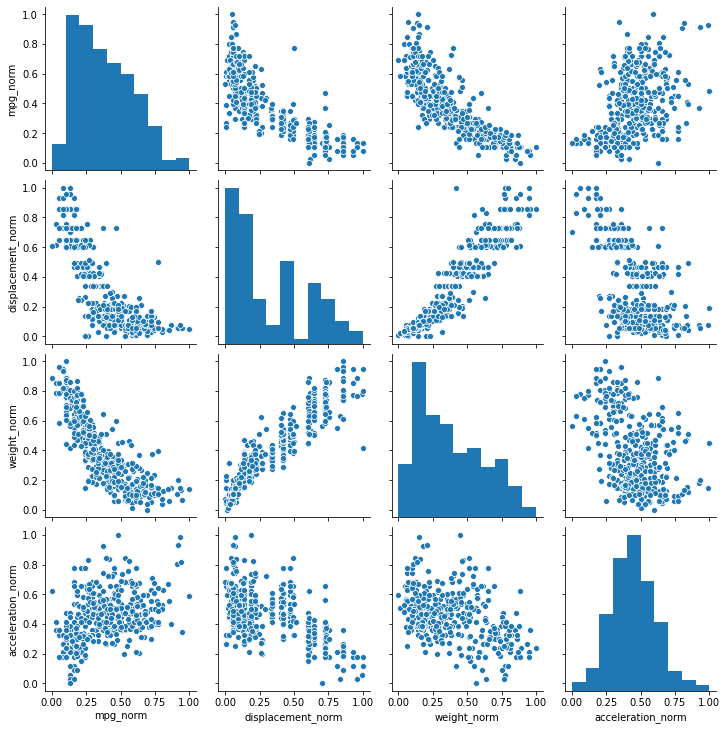

In [62]:
sns.pairplot(auto[num_cols_norm]);

Here's the same example, but using Z-normalization.

In [64]:
znorm_scaler = StandardScaler()
znorm_scaler.fit(auto[num_cols])
auto[num_cols_norm] = pd.DataFrame(znorm_scaler.transform(auto[num_cols]))
auto[num_cols_norm].head()

,mpg_norm,displacement_norm,weight_norm,acceleration_norm
0,-0.706439,1.090604,0.630870,-1.295498
1,-1.090751,1.503514,0.854333,-1.477038
2,-0.706439,1.196232,0.550470,-1.658577
3,-0.962647,1.061796,0.546923,-1.295498
4,-0.834543,1.042591,0.565841,-1.840117


Let's look at the scatter plot matirx for the normalized features.

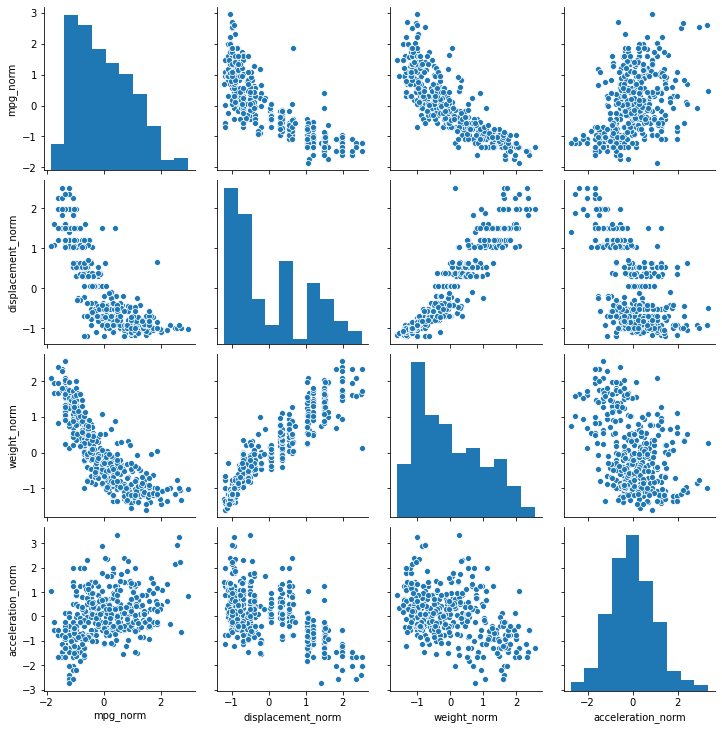

In [65]:
sns.pairplot(auto[num_cols_norm]);

In either case, it doesn't look like normalization did anything to make our scatter plot matrix looks different. Do you notice what changed? The answer is that the **scale of the data** is what changed. Just check the $x$ and $y$ axes and you'll see. Normalization is not really supposed to change the nature of the data, just put all features on the same scale.

Let's look one last time at the code for normalizing the data using `sklearn`.

In [67]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(auto[num_cols])
auto[num_cols_norm] = pd.DataFrame(minmax_scaler.transform(auto[num_cols]))
auto[num_cols_norm].head()

MinMaxScaler(copy=True, feature_range=(0, 1))


,mpg_norm,displacement_norm,weight_norm,acceleration_norm
0,0.239362,0.617571,0.536150,0.238095
1,0.159574,0.728682,0.589736,0.208333
2,0.239362,0.645995,0.516870,0.178571
3,0.186170,0.609819,0.516019,0.238095
4,0.212766,0.604651,0.520556,0.148810


There's two things we need to point out about the code above:

In the third line, notice how we used `pd.DataFrame` to turn the data into a `DataFrame` object. This is because `sklearn` returns a `numpy` array instead of a `DataFrame`. As we saw earlier, the distinction is most of the time unimportant since a `DataFrame` is just a sort of wrapper for a `numpy` array, but if we want to use `DataFrame` methods like `head` to examine the results, we need to do our own conversion.

You might be curious why we use `fit` followed by `transform`. What exactly happens when we run `fit`? Why should those two not be steps not be a single step? The answer to that will become obvious later in the context of machine learning, but here's a short answer using `MinMaxScaler` as our example:
  - When we run `fit` we find the min and max for the columns and rememeber it.
  - When we run `transform` we apply the transformation using the min and max we found when we ran `fit`.

This means that we can learn the min and max once, and then apply the **same** transformation (with the same min and max) not just to the original data, but any future data. In machine learning, this has important consequences, but that's the topic of a future lecture.